This project is about spam detection based on database on kaggle: https://www.kaggle.com/team-ai/spam-text-message-classification

Here we need explore text message data and create models to predict if a message is spam or not. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

%matplotlib inline
plt.style.use('seaborn-deep')

In [2]:
spam_data = pd.read_csv('spam.csv')
spam_data

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [3]:
spam_data['target'] = np.where(spam_data['Category']=='spam',1,0)
spam_data.head(10)

,Category,Message,target
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
5,spam,FreeMsg Hey there darling it's been 3 week's n...,1
6,ham,Even my brother is not like to speak with me. ...,0
7,ham,As per your request 'Melle Melle (Oru Minnamin...,0
8,spam,WINNER!! As a valued network customer you have...,1
9,spam,Had your mobile 11 months or more? U R entitle...,1


In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(spam_data['Message'], 
                                                    spam_data['target'], 
                                                    random_state=0)

In [6]:
X_train

872     Its going good...no problem..but still need li...
831     U have a secret admirer. REVEAL who thinks U R...
1273                                                Ok...
3314    Huh... Hyde park not in mel ah, opps, got conf...
4929    Just hopeing that wasn‘t too pissed up to reme...
                              ...                        
4931    Hi, the SEXYCHAT girls are waiting for you to ...
3264                              So u gonna get deus ex?
1653    For ur chance to win a £250 cash every wk TXT:...
2607    R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO ...
2732    Mm feeling sleepy. today itself i shall get th...
Name: Message, Length: 4179, dtype: object

# Explorate Data

In [7]:
print('What percentage of the documents in "spam_data" are spam?')
print('% 2.2f'%(spam_data[spam_data['target']==1].shape[0]/spam_data.shape[0]*100))

What percentage of the documents in "spam_data" are spam?
 13.41


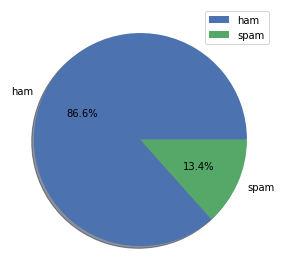

In [8]:
plt.figure()
plt.pie(spam_data['Category'].value_counts(), labels=['ham','spam'], autopct='%1.1f%%', shadow=True) 
plt.tight_layout()
plt.legend()
plt.show()

In [9]:
# get text length of each text
spam_data['text_length'] = spam_data['Message'].apply(len)

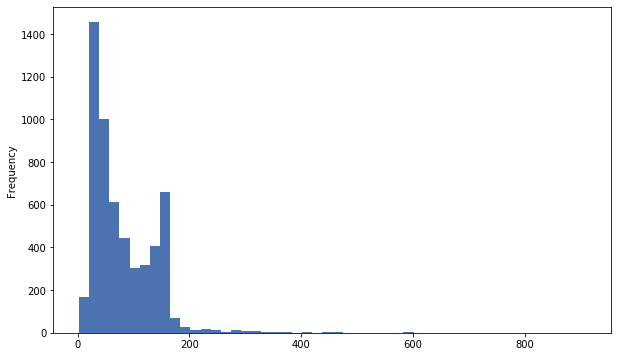

In [10]:
plt.figure(figsize=(10,6))
spam_data['text_length'].plot.hist(bins = 50)

In [11]:
nonSpam = spam_data[spam_data['target'] == 0]
spam = spam_data[spam_data['target'] == 1]
print('Average length of text for not spam: % 4.2f'%(nonSpam['text_length'].sum()/len(nonSpam)))
print('Average length of text for spam: % 4.2f'%(spam['text_length'].sum()/len(spam)))

Average length of text for not spam:  71.45
Average length of text for spam:  137.99


In [12]:
from sklearn.feature_extraction.text import CountVectorizer

In [13]:
vect = CountVectorizer().fit(X_train)

In [14]:
# find the longest token in the vocabulary
max(vect.get_feature_names(), key=lambda token:len(token))

'hypotheticalhuagauahahuagahyuhagga'

# multinomial Naive Bayes classifier

In [15]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import roc_auc_score, confusion_matrix, classification_report

In [16]:
X_train_vectorized = vect.transform(X_train)
clf = MultinomialNB(alpha=0.1)
clf.fit(X_train_vectorized, y_train)
predictions = clf.predict(vect.transform(X_test))

In [17]:
print('MultinomialNB ROC Accuracy Sorce is: ', roc_auc_score(y_test, predictions))

MultinomialNB ROC Accuracy Sorce is:  0.9619675138714874


In [18]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1214
           1       0.93      0.96      0.95       179

    accuracy                           0.99      1393
   macro avg       0.96      0.98      0.97      1393
weighted avg       0.99      0.99      0.99      1393



In [40]:
X_train

872     Its going good...no problem..but still need li...
831     U have a secret admirer. REVEAL who thinks U R...
1273                                                Ok...
3314    Huh... Hyde park not in mel ah, opps, got conf...
4929    Just hopeing that wasn‘t too pissed up to reme...
                              ...                        
4931    Hi, the SEXYCHAT girls are waiting for you to ...
3264                              So u gonna get deus ex?
1653    For ur chance to win a £250 cash every wk TXT:...
2607    R U &SAM P IN EACHOTHER. IF WE MEET WE CAN GO ...
2732    Mm feeling sleepy. today itself i shall get th...
Name: Message, Length: 4179, dtype: object

In [30]:
# Random choose few message to test
import random 
random.seed(1)

sequence = [i for i in range(spam_data.shape[0])]
subset = random.sample(sequence, 5)
print(subset)

[1100, 4662, 516, 2089, 965]


In [42]:
new_text = spam_data['Message'].iloc[subset]
new_text

1100    Been up to ne thing interesting. Did you have ...
4662                                        Ok no prob...
516                            S:)no competition for him.
2089    Well done ENGLAND! Get the official poly ringt...
965                                Are you this much buzy
Name: Message, dtype: object

In [44]:
clf.predict(vect.transform(new_text))

array([0, 0, 0, 1, 0])

In [46]:
# true data
spam_data['target'].iloc[subset]

1100    0
4662    0
516     0
2089    1
965     0
Name: target, dtype: int32

### !!! GOOD RESULTS

# Find features of tf-idf values

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [48]:
vect = TfidfVectorizer().fit(X_train)
X_train_vectorized = vect.transform(X_train)

In [49]:
feature_names = np.array(vect.get_feature_names())
sorted_tfidf_index = X_train_vectorized.max(0).toarray()[0].argsort()

In [53]:
# What 10 features have the smallest tf-idf?
small_index = feature_names[sorted_tfidf_index[:10]]
small_value = X_train_vectorized.max(0).toarray()[0][sorted_tfidf_index[:10]]
smallTuples = [(value, word) for word, value in zip(small_index, small_value)]
smallTuples.sort()
small_index = [element[1] for element in smallTuples]
small_value = [element[0] for element in smallTuples]
small_series = pd.Series(small_value,index=small_index)
small_series

aaniye          0.075064
chef            0.075064
companion       0.075064
exterminator    0.075064
healer          0.075064
psychiatrist    0.075064
psychologist    0.075064
pudunga         0.075064
sympathetic     0.075064
venaam          0.075064
dtype: float64

In [54]:
# What 10 features have the largest tf-idf?
big_index = feature_names[sorted_tfidf_index[-10:]]
big_value = X_train_vectorized.max(0).toarray()[0][sorted_tfidf_index[-10:]]
bigTuples = [(-value, word) for word, value in zip(big_index, big_value)]
bigTuples.sort()
big_index = [element[1] for element in bigTuples]
big_value = [-element[0] for element in bigTuples]
big_series = pd.Series(big_value,index=big_index)
big_series

146tf150p    1.0
645          1.0
alrite       1.0
anything     1.0
error        1.0
lei          1.0
nite         1.0
ok           1.0
too          1.0
yup          1.0
dtype: float64

# SVM classification

In [55]:
from sklearn.svm import SVC

In [56]:
vect = TfidfVectorizer(min_df=3).fit(X_train)
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)
# imbalanced dataset, C cannot be large value
model = SVC(C=1)
model.fit(X_train_vectorized, y_train)
predictions = model.predict(X_test_vectorized)    

In [57]:
print('SVM ROC Accuracy Sorce is: ', roc_auc_score(y_test, predictions))

SVM ROC Accuracy Sorce is:  0.9513513513513514


In [58]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1226
           1       0.90      1.00      0.95       167

    accuracy                           0.99      1393
   macro avg       0.95      0.99      0.97      1393
weighted avg       0.99      0.99      0.99      1393



# Logistic Regression

In [59]:
from sklearn.linear_model import LogisticRegression

In [60]:
vect = TfidfVectorizer(min_df=5, ngram_range=(1,3)).fit(X_train)
X_train_vectorized = vect.transform(X_train)
X_test_vectorized = vect.transform(X_test)


model = LogisticRegression(C=100)
model.fit(X_train_vectorized, y_train)

predictions = model.predict(X_test_vectorized)

C:\Users\Xiaodan\Anaconda3\envs\py36tf\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [61]:
print('Logistic ROC Accuracy Sorce is: ', roc_auc_score(y_test, predictions))

Logistic ROC Accuracy Sorce is:  0.9559289421872204


In [62]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99      1222
           1       0.91      0.99      0.95       171

    accuracy                           0.99      1393
   macro avg       0.96      0.99      0.97      1393
weighted avg       0.99      0.99      0.99      1393

